# Load and Inspect Data

In [1]:
# Import ing Libraries
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

In [2]:
# Load the dataset
data = pd.read_json("loan_approval_dataset.json")

# Basic Data Exploration

In [3]:
data.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 26.9+ MB


In [5]:
data.describe()

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,252000.000000,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,126000.500000,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000
std,72746.278255,2.878311e+06,17.063855,6.002590,3.647053,1.399037,0.328438
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,63000.750000,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,126000.500000,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,189000.250000,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,252000.000000,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


# Feature Engineering

In [6]:
# Cleaning the data
def clean_data(text):
    return re.sub(r'\[\d+\]', '', text).strip()

data['CITY'] = data['CITY'].apply(clean_data)
data['STATE'] = data['STATE'].apply(clean_data)

In [7]:
# Mapping the data
data["Married/Single"] = data["Married/Single"].map({'married' : 1, 'single' : 0})

In [8]:
# Onehot Encoding 
data = pd.get_dummies(data, columns = ['House_Ownership', 'Car_Ownership'])

In [9]:
# Frequency Encoding
for column in ['Profession', 'CITY', 'STATE']:
    freq_encode = data[column].value_counts().to_dict()
    data[column] = data[column].map(freq_encode)

In [10]:
data.head()

,Id,Income,Age,Experience,Married/Single,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,House_Ownership_norent_noown,House_Ownership_owned,House_Ownership_rented,Car_Ownership_no,Car_Ownership_yes
0,1,1303834,23,3,0,5217,798,14122,3,13,0,False,False,True,True,False
1,2,7574516,40,10,0,5053,849,25562,9,13,0,False,False,True,True,False
2,3,3991815,66,4,1,5195,688,5805,4,10,0,False,False,True,True,False
3,4,6256451,41,2,0,5053,607,4658,2,12,1,False,False,True,False,True
4,5,5768871,47,11,0,4413,809,16537,3,14,1,False,False,True,True,False


# Data Visualization

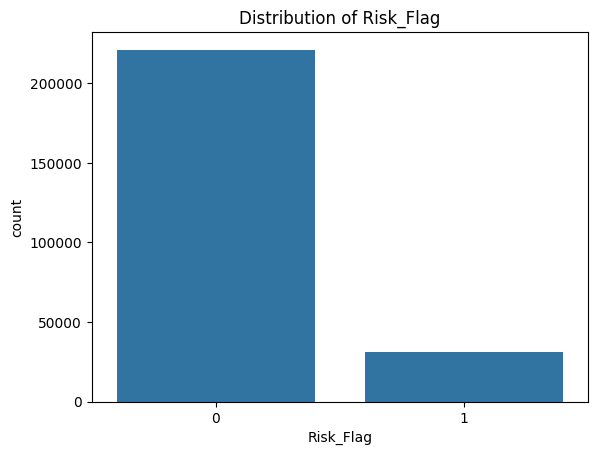

In [11]:
# Distribution of Risk_Flag
sns.countplot(x='Risk_Flag', data=data)
plt.title('Distribution of Risk_Flag')
plt.savefig('risk_flag_distribution.png')
plt.show()


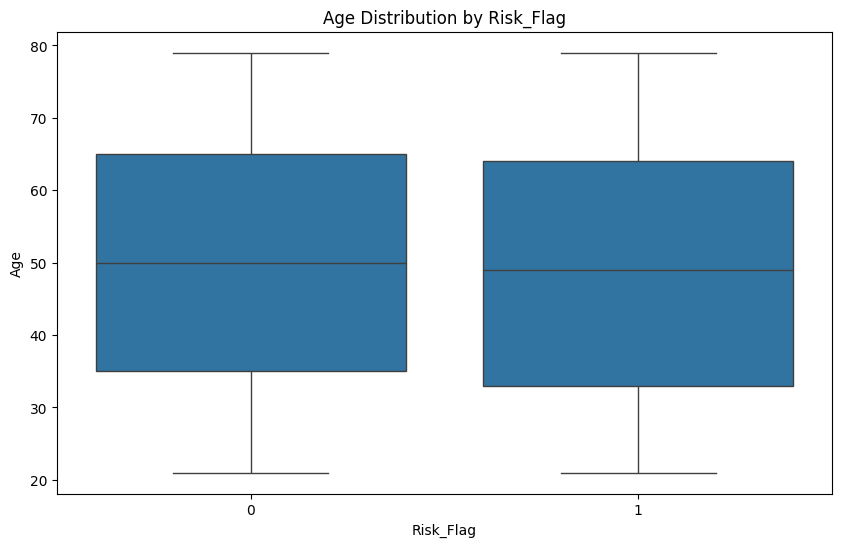

In [12]:
# Box Plot of Age by Risk_Flag
plt.figure(figsize=(10, 6))
sns.boxplot(x='Risk_Flag', y='Age', data=data)
plt.title('Age Distribution by Risk_Flag')
plt.xlabel('Risk_Flag')
plt.ylabel('Age')
plt.savefig('age_distribution_by_risk_flag.png')
plt.show()

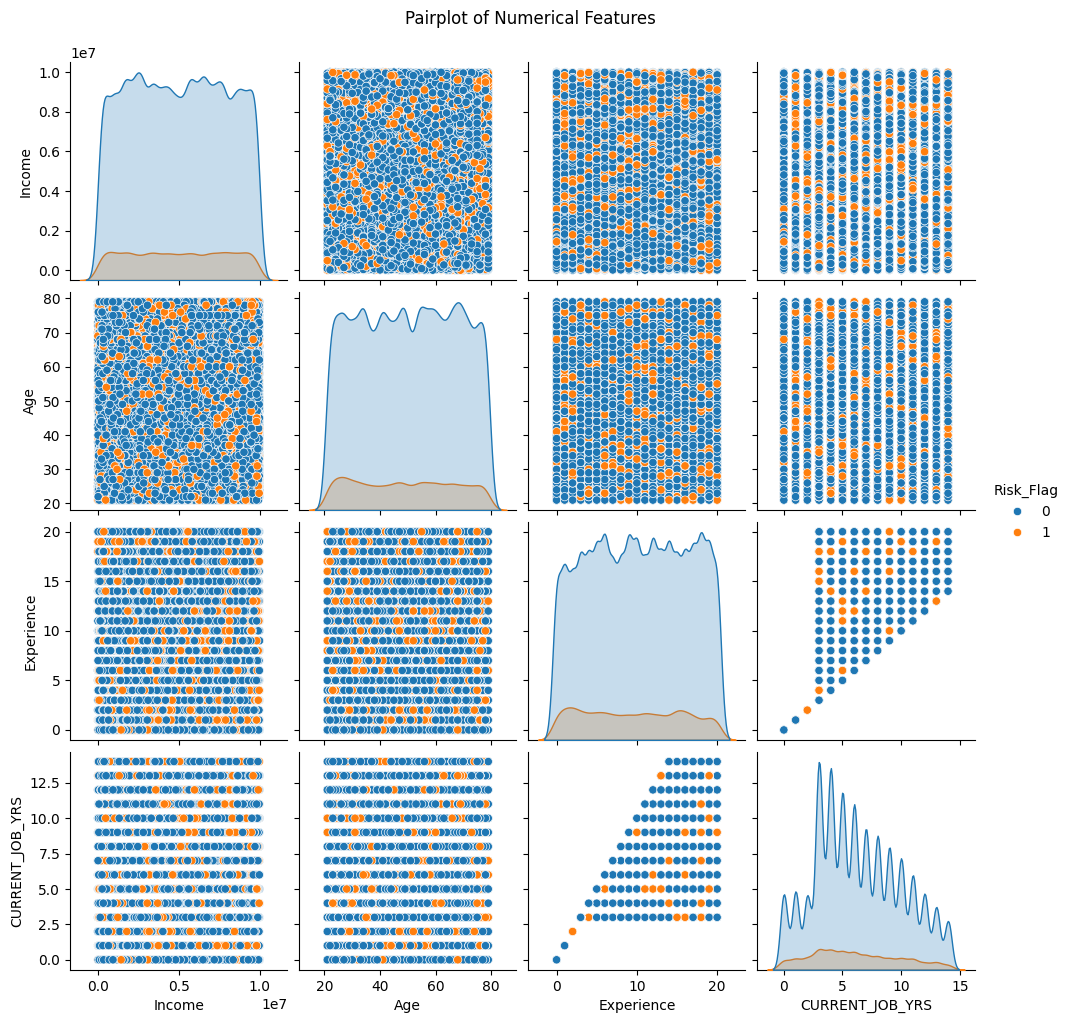

In [13]:
# Pairplot for selected features
sns.pairplot(data[['Income', 'Age', 'Experience', 'CURRENT_JOB_YRS', 'Risk_Flag']], hue='Risk_Flag')
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.savefig('pairplot_numerical_features.png')
plt.show()

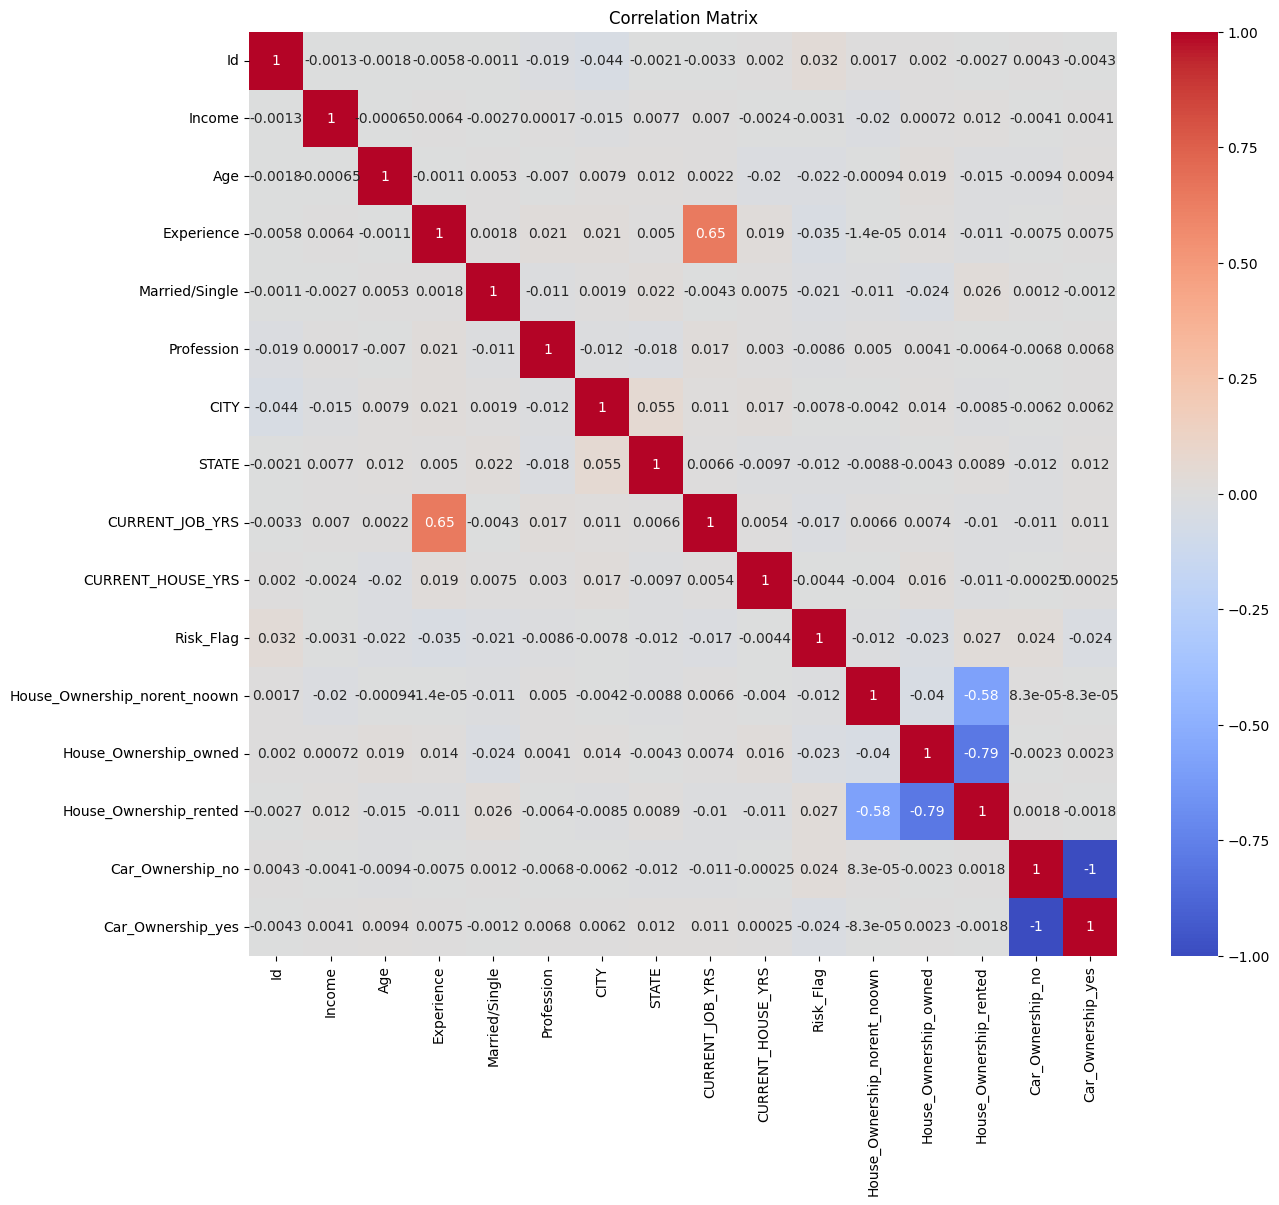

In [14]:
# Correlation Matrix
plt.figure(figsize = (14,12))
sns.heatmap(data.corr(), annot =True, cmap = 'coolwarm')
plt.title("Correlation Matrix")
plt.savefig('correlation_matrix.png')
plt.show()

# Model Building and Evaluation

In [15]:
# Splitting the data
X = data.drop('Risk_Flag', axis = 1)
y = data['Risk_Flag']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 35)

In [16]:
# Standardizing the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
# Model training and evaluation function
def evaluate_model(model, X_train, y_train, X_test, y_test, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    print(f'{model_name}:')
    print(f'Accuracy: {accuracy}')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'F1 score: {f1}')
    print(f'ROC AUC Score: {roc_auc}')
    print(f'Confusion Matrix:\n{conf_matrix}')
    print(f'Classification Report:\n{report}')
    
    return accuracy, precision, recall, f1, roc_auc, conf_matrix, report

In [18]:
# Random Forest Model
random = RandomForestClassifier(n_estimators=100, random_state=42)
rf_metrics = evaluate_model(random, X_train, y_train, X_test, y_test, "Random Forest Classifier")

Random Forest Classifier:
Accuracy: 0.9043968253968254
Precision: 0.6544943820224719
Recall: 0.4554932881532647
F1 score: 0.537155152539768
ROC AUC Score: 0.7110730489061008
Confusion Matrix:
[[53482  1845]
 [ 4178  3495]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     55327
           1       0.65      0.46      0.54      7673

    accuracy                           0.90     63000
   macro avg       0.79      0.71      0.74     63000
weighted avg       0.89      0.90      0.90     63000



In [19]:
# KNN Model
knn = KNeighborsClassifier(n_neighbors=5)
knn_metrics = evaluate_model(knn, X_train, y_train, X_test, y_test, "K-Nearest Neighbors Classifier")

K-Nearest Neighbors Classifier:
Accuracy: 0.8904920634920634
Precision: 0.5586186004241139
Recall: 0.48064642252052653
F1 score: 0.516707530647986
ROC AUC Score: 0.713988871787673
Confusion Matrix:
[[52413  2914]
 [ 3985  3688]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94     55327
           1       0.56      0.48      0.52      7673

    accuracy                           0.89     63000
   macro avg       0.74      0.71      0.73     63000
weighted avg       0.88      0.89      0.89     63000



In [20]:
# XGBoost Model
xgb_model = xgb.XGBClassifier(objective='binary:logistic', random_state=42)
xgb_metrics = evaluate_model(xgb_model, X_train, y_train, X_test, y_test, "XGBoost Classifier")

XGBoost Classifier:
Accuracy: 0.919031746031746
Precision: 0.9197127937336814
Recall: 0.36726182718623746
F1 score: 0.5249138493061376
ROC AUC Score: 0.6814077675703811
Confusion Matrix:
[[55081   246]
 [ 4855  2818]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     55327
           1       0.92      0.37      0.52      7673

    accuracy                           0.92     63000
   macro avg       0.92      0.68      0.74     63000
weighted avg       0.92      0.92      0.90     63000



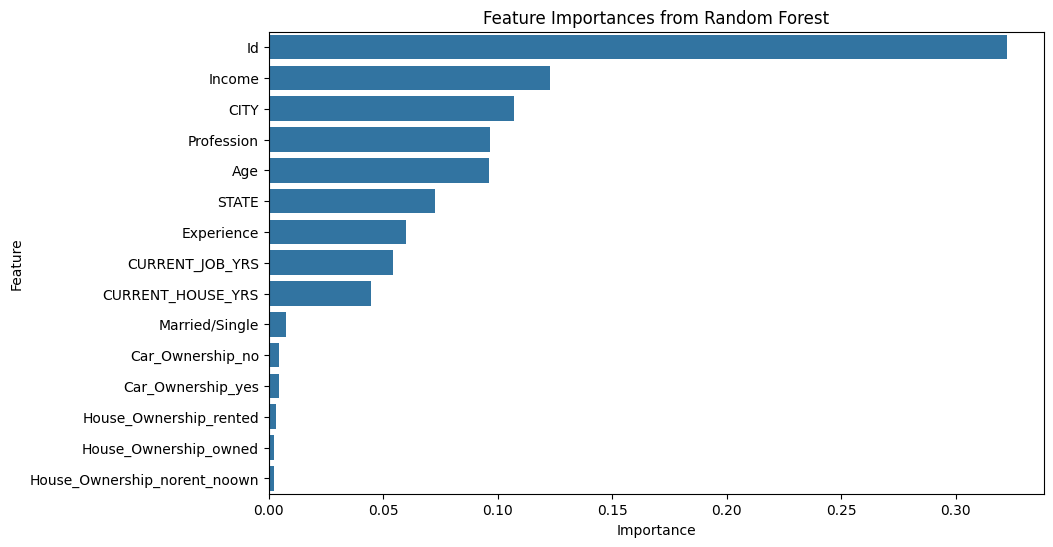

In [21]:
# Feature importance from Random Forest
rf_feature_importances = random.feature_importances_
features = X.columns
rf_importance_df = pd.DataFrame({'Feature': features, 'Importance': rf_feature_importances}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=rf_importance_df)
plt.title('Feature Importances from Random Forest')
plt.savefig('rf_feature_importances.png')
plt.show()

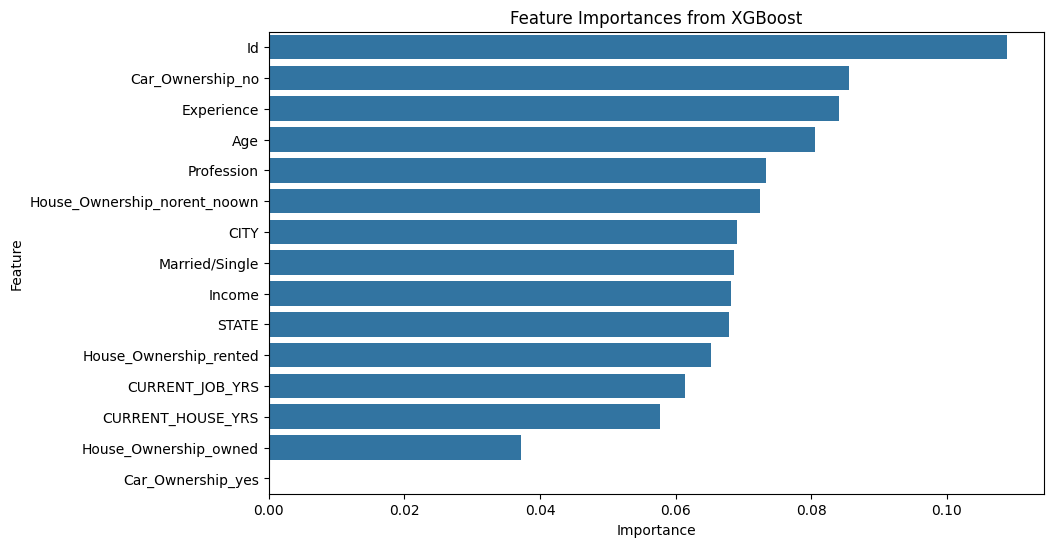

In [22]:
# Feature importance from XGBoost
xgb_feature_importances = xgb_model.feature_importances_
xgb_importance_df = pd.DataFrame({'Feature': features, 'Importance': xgb_feature_importances}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=xgb_importance_df)
plt.title('Feature Importances from XGBoost')
plt.savefig('xgb_feature_importances.png')
plt.show()

In [23]:
# Plotting Confusion Matrix
def plot_confusion_matrix(conf_matrix, model_name):
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Low Risk', 'High Risk'], yticklabels=['Low Risk', 'High Risk'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'{model_name} Confusion Matrix')
    plt.savefig(f'{model_name.lower().replace(" ", "_")}_confusion_matrix.png')
    print(f'{model_name.lower().replace(" ", "_")}_confusion_matrix.png')
    plt.show()

random_forest_confusion_matrix.png


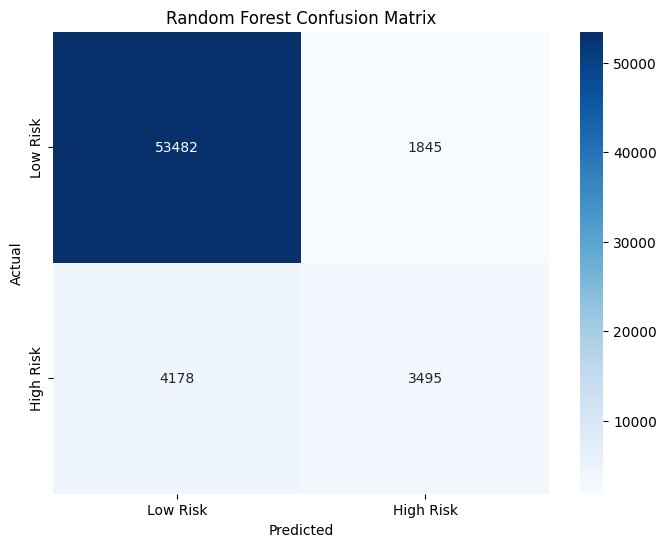

k-nearest_neighbors_confusion_matrix.png


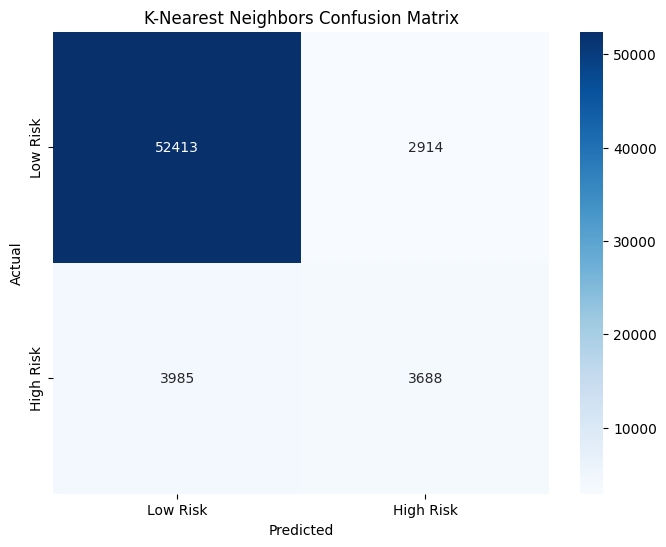

xgboost_confusion_matrix.png


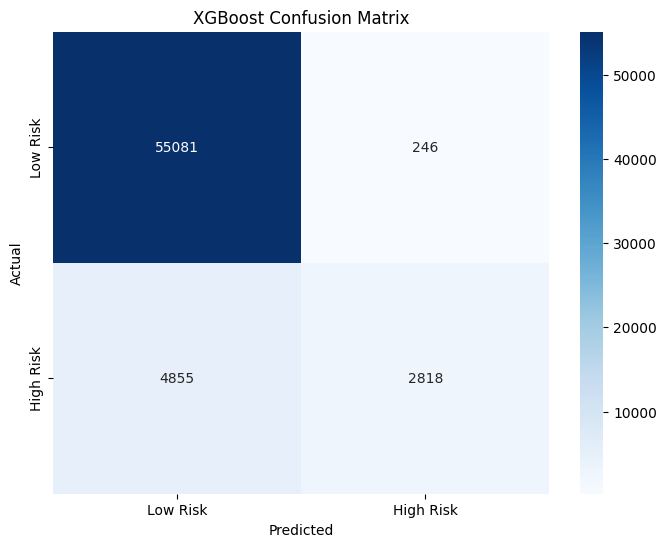

In [24]:
# Plot and save confusion matrices
plot_confusion_matrix(rf_metrics[5], "Random Forest")
plot_confusion_matrix(knn_metrics[5], "K-Nearest Neighbors")
plot_confusion_matrix(xgb_metrics[5], "XGBoost")